<a href="https://colab.research.google.com/github/abdurrahman16/customer_Sentiment-Analysis/blob/main/customer_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customer_Sentiment.csv')

In [3]:
df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [ ]:
# Drop the 'review_text' column as it contains free text
df = df.drop('review_text', axis=1)

# Convert binary categorical columns to numerical (0 or 1)
df['issue_resolved'] = df['issue_resolved'].map({'yes': 1, 'no': 0})
df['complaint_registered'] = df['complaint_registered'].map({'yes': 1, 'no': 0})

# Identify remaining categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding to the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.info()

In [ ]:
df.info()

In [4]:
df.describe(include='all')

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
count,20413.000000,20413,20413,20413,20413,20413,20413,20413.000000,20413,20413,20413.000000,20412,20412
unique,NaN,3,5,5,9,1,20,NaN,15,3,NaN,2,2
top,NaN,male,60+,west,groceries,online,others,NaN,"amazing experience, highly recommend!",negative,NaN,yes,no
freq,NaN,6892,4183,4160,2335,20413,1059,NaN,1704,8140,NaN,13561,12272
mean,10207.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.998285,NaN,NaN,36.024494,NaN,NaN
std,5892.869858,NaN,NaN,NaN,NaN,NaN,NaN,1.402856,NaN,NaN,20.566923,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,5104.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,18.000000,NaN,NaN
50%,10207.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,36.000000,NaN,NaN
75%,15310.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,54.000000,NaN,NaN


In [5]:
df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20412 entries, 0 to 20411
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           20412 non-null  int64 
 1   gender                20412 non-null  object
 2   age_group             20412 non-null  object
 3   region                20412 non-null  object
 4   product_category      20412 non-null  object
 5   purchase_channel      20412 non-null  object
 6   platform              20412 non-null  object
 7   customer_rating       20412 non-null  int64 
 8   review_text           20412 non-null  object
 9   sentiment             20412 non-null  object
 10  response_time_hours   20412 non-null  int64 
 11  issue_resolved        20412 non-null  object
 12  complaint_registered  20412 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.2+ MB


In [7]:
df = df.drop(['customer_id', 'review_text'], axis=1)

# Convert binary categorical columns to numerical (0 or 1)
df['issue_resolved'] = df['issue_resolved'].map({'yes': 1, 'no': 0})
df['complaint_registered'] = df['complaint_registered'].map({'yes': 1, 'no': 0})

# Identify remaining categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding to the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20412 entries, 0 to 20411
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   customer_rating                  20412 non-null  int64
 1   response_time_hours              20412 non-null  int64
 2   issue_resolved                   20412 non-null  int64
 3   complaint_registered             20412 non-null  int64
 4   gender_male                      20412 non-null  bool 
 5   gender_other                     20412 non-null  bool 
 6   age_group_26-35                  20412 non-null  bool 
 7   age_group_36-45                  20412 non-null  bool 
 8   age_group_46-60                  20412 non-null  bool 
 9   age_group_60+                    20412 non-null  bool 
 10  region_east                      20412 non-null  bool 
 11  region_north                     20412 non-null  bool 
 12  region_south                     20412 non-null  bo

In [8]:
df['sentiment_encoded'] = 0
df.loc[df['sentiment_neutral'] == True, 'sentiment_encoded'] = 1
df.loc[df['sentiment_positive'] == True, 'sentiment_encoded'] = 2
df = df.drop(['sentiment_neutral', 'sentiment_positive'], axis=1)
df.head()

,customer_rating,response_time_hours,issue_resolved,complaint_registered,gender_male,gender_other,age_group_26-35,age_group_36-45,age_group_46-60,age_group_60+,...,platform_nykaa,platform_others,platform_paytm mall,platform_reliance digital,platform_shopclues,platform_snapdeal,platform_swiggy instamart,platform_tata cliq,platform_zepto,sentiment_encoded
0,1,46,1,1,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0
1,5,5,1,0,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,2
2,1,38,1,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0
3,2,16,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
4,3,15,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [9]:
from sklearn.model_selection import train_test_split

# Select feature columns (all 'platform_' columns and 'customer_rating')
platform_cols = [col for col in df.columns if col.startswith('platform_')]
X = df[platform_cols + ['customer_rating']]

# Define the target variable
y = df['sentiment_encoded']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16329, 20)
X_test shape: (4083, 20)
y_train shape: (16329,)
y_test shape: (4083,)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [11]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


In [12]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test)

print("Predictions for Logistic Regression model generated.")

Predictions for Logistic Regression model generated.


In [13]:
y_pred_svm = svm_model.predict(X_test)

print("Predictions for SVM model generated.")

Predictions for SVM model generated.


In [14]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1641
           1       1.00      1.00      1.00       851
           2       1.00      1.00      1.00      1591

    accuracy                           1.00      4083
   macro avg       1.00      1.00      1.00      4083
weighted avg       1.00      1.00      1.00      4083



In [15]:
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1641
           1       1.00      1.00      1.00       851
           2       1.00      1.00      1.00      1591

    accuracy                           1.00      4083
   macro avg       1.00      1.00      1.00      4083
weighted avg       1.00      1.00      1.00      4083



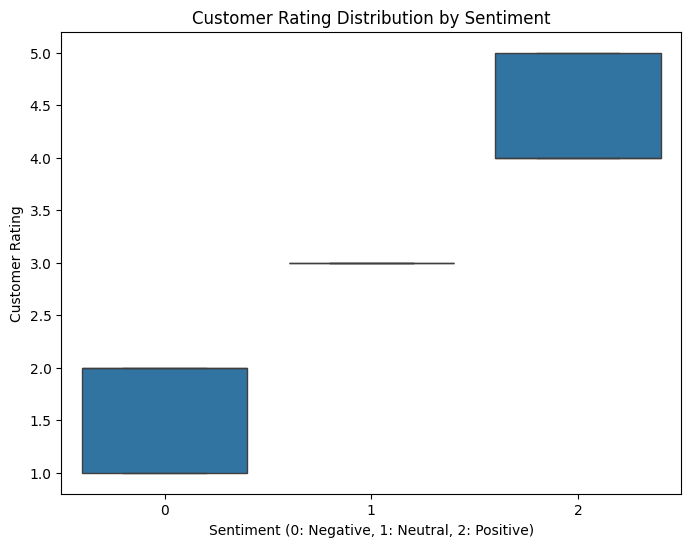

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_encoded', y='customer_rating', data=df)
plt.xlabel('Sentiment (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Customer Rating')
plt.title('Customer Rating Distribution by Sentiment')
plt.show()

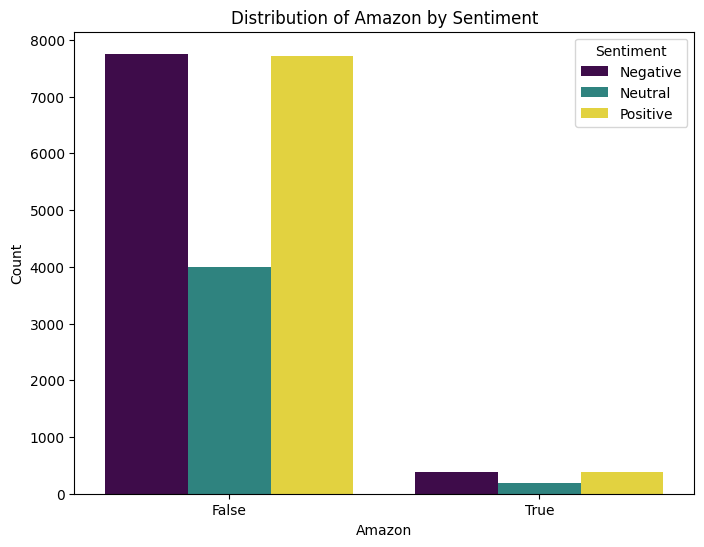

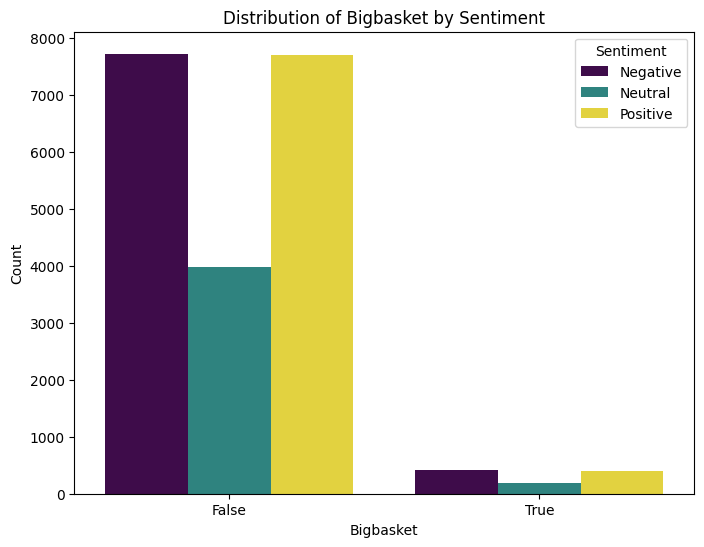

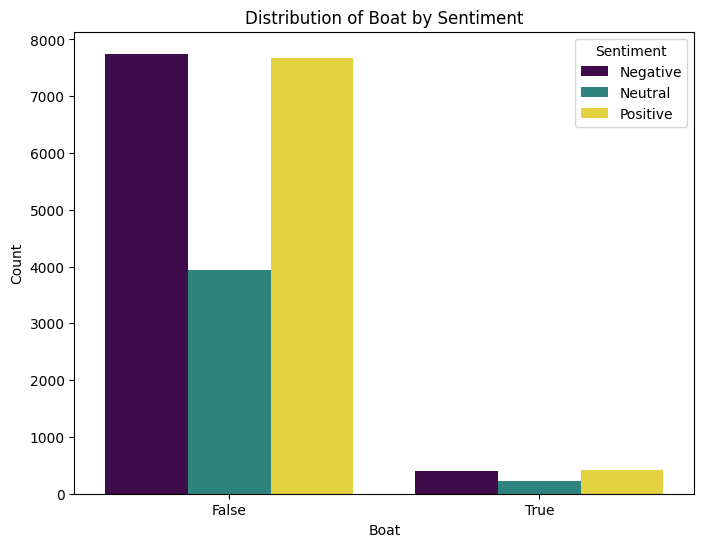

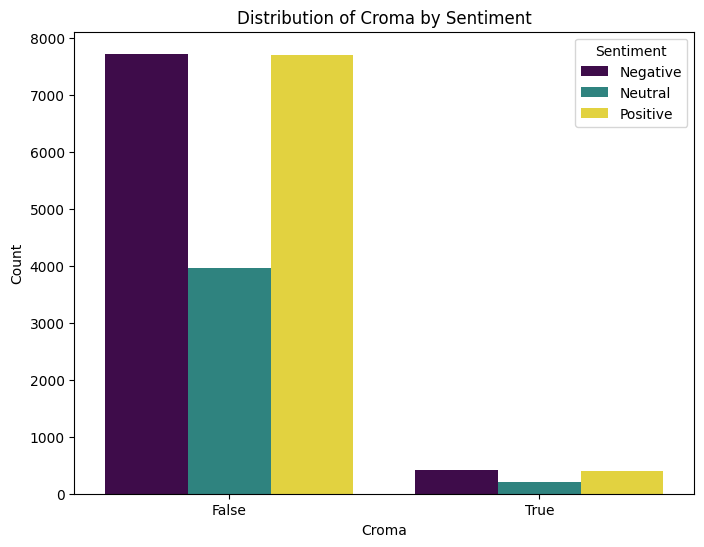

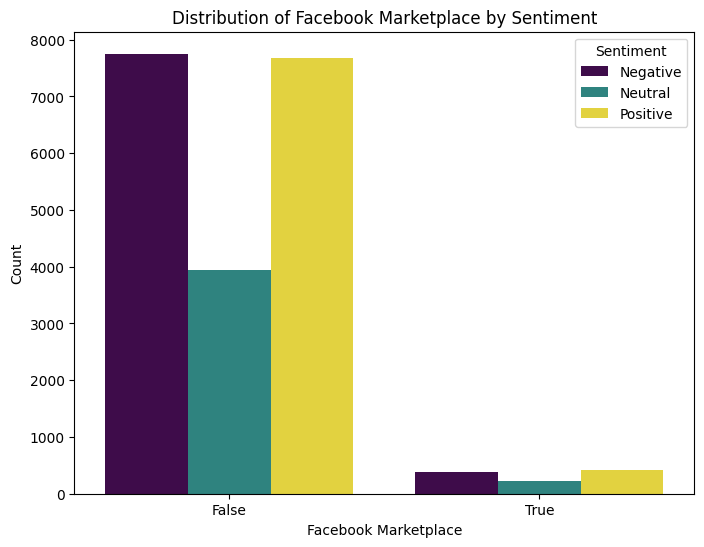

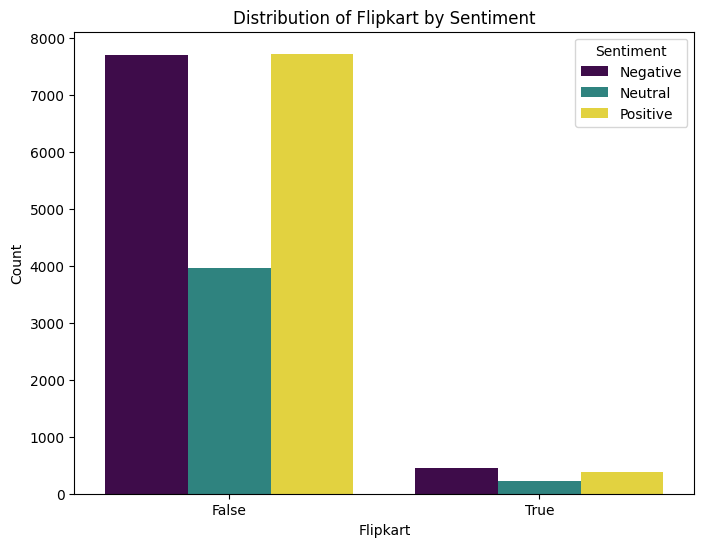

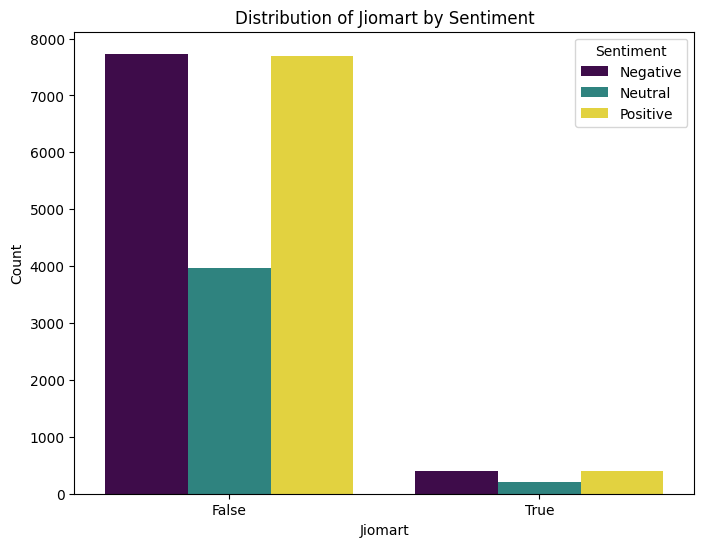

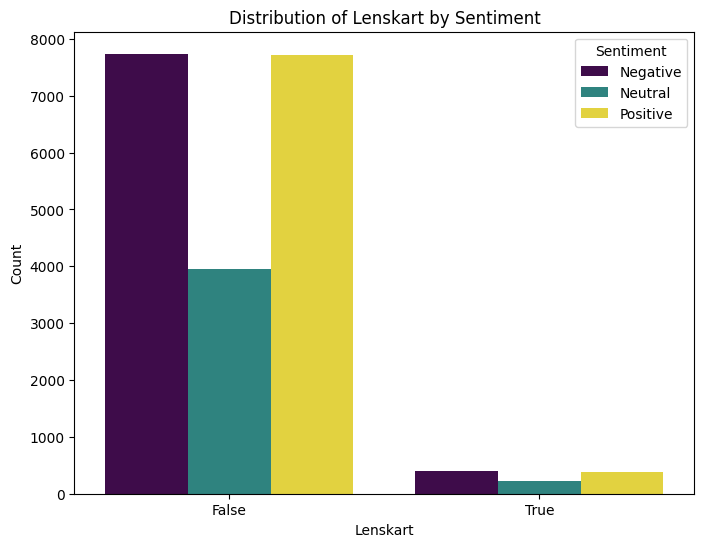

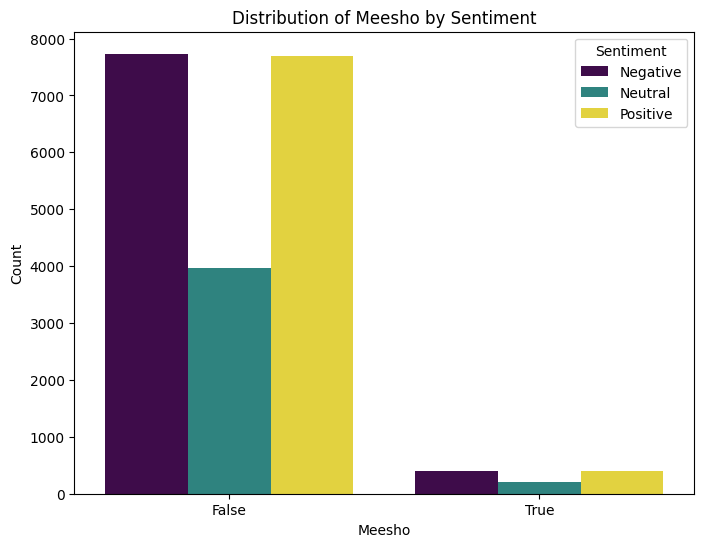

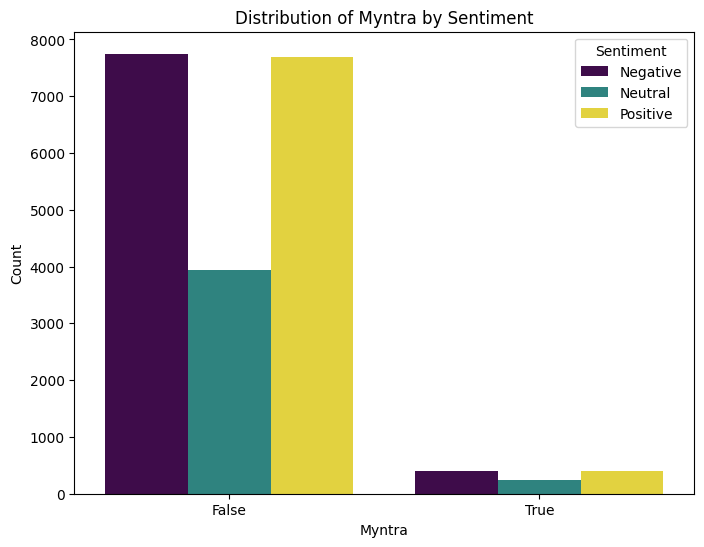

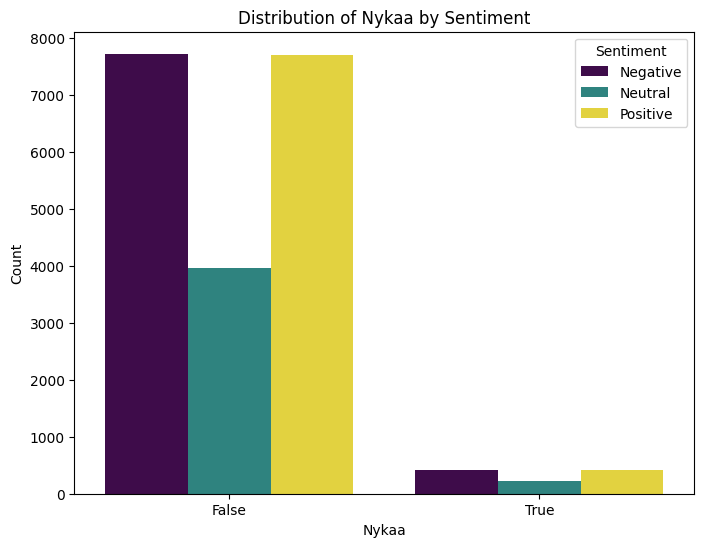

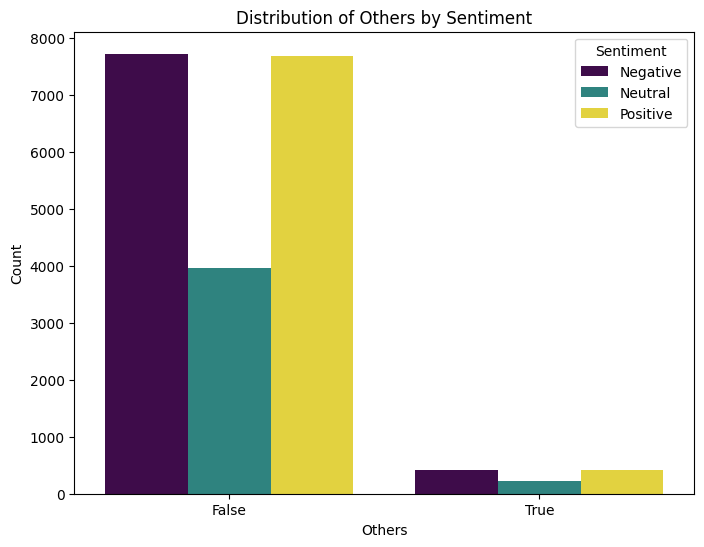

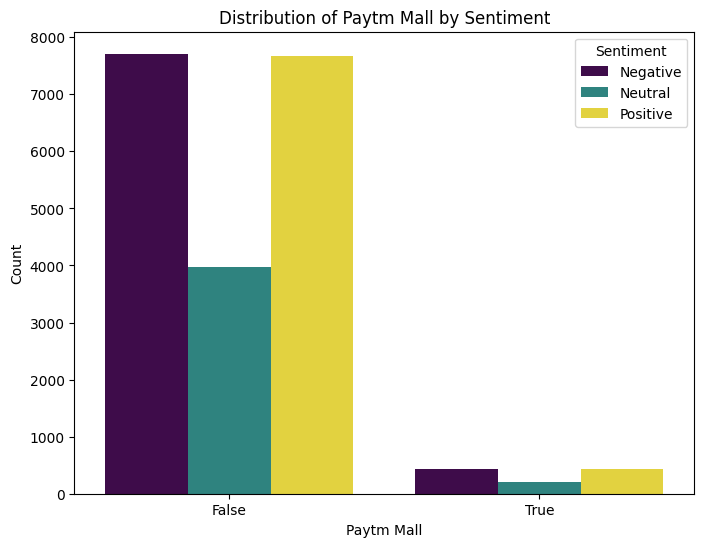

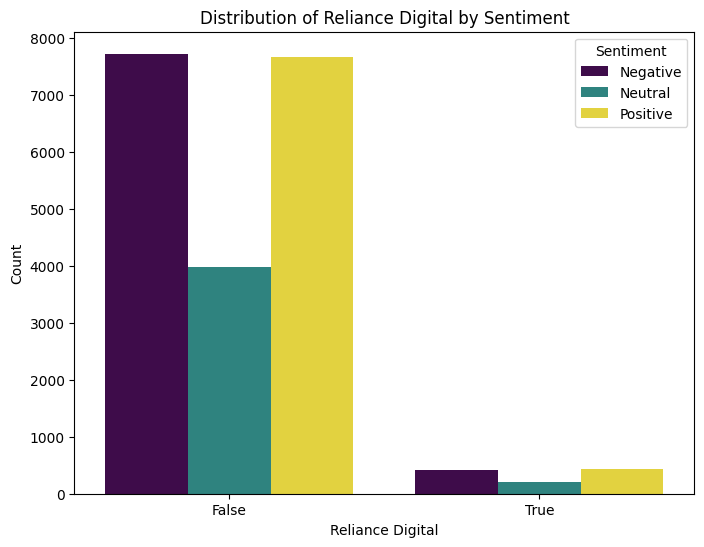

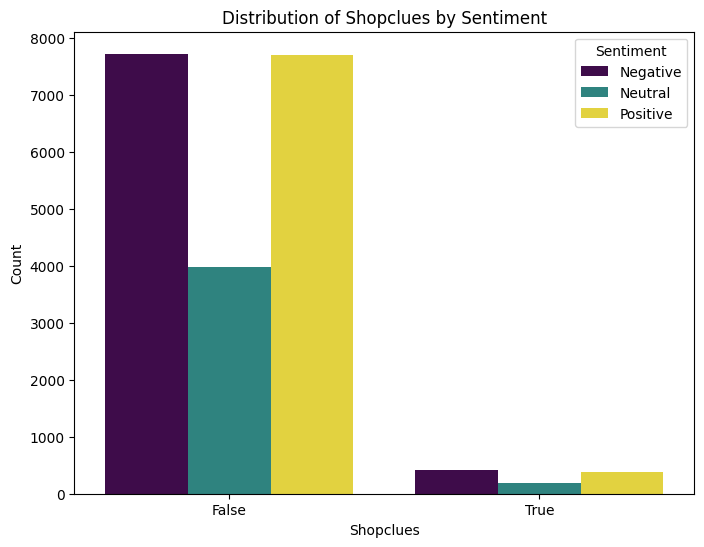

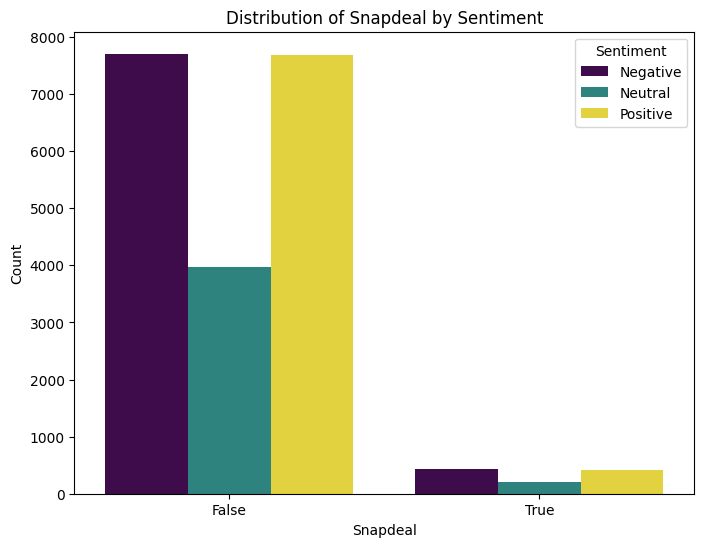

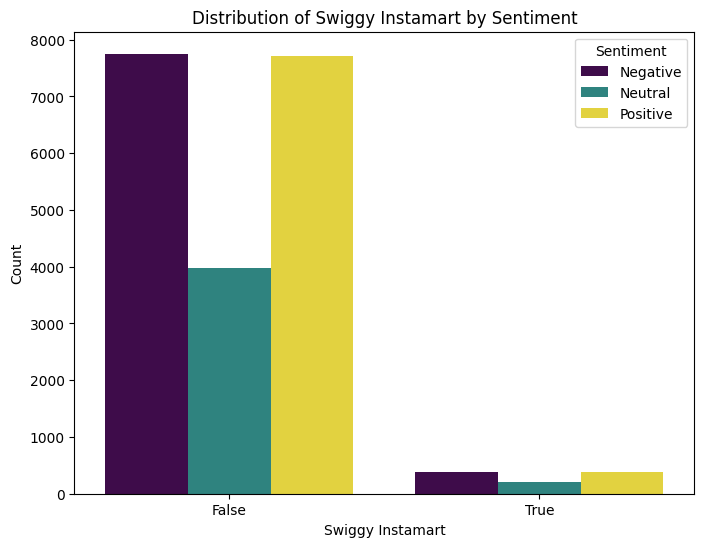

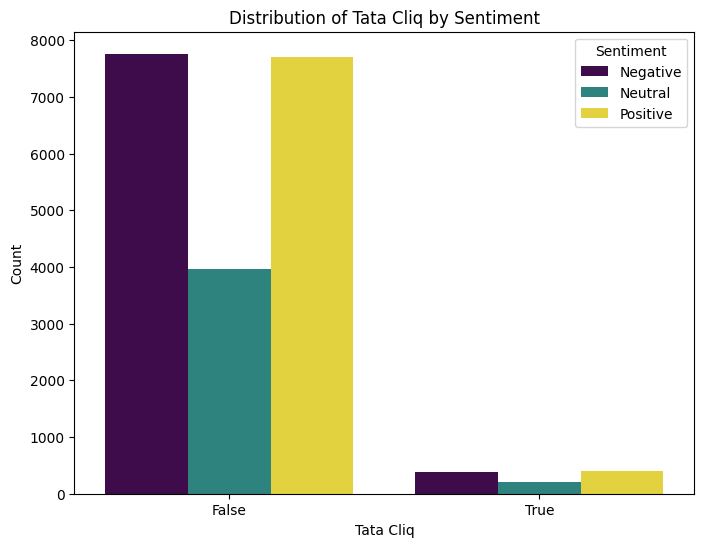

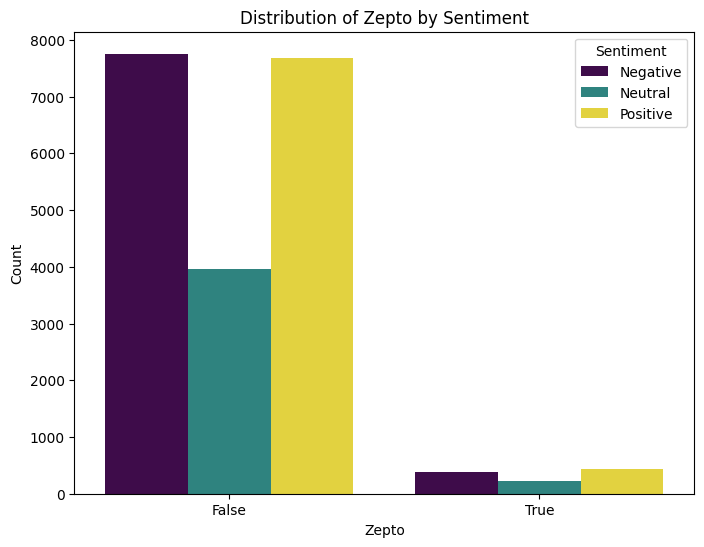

In [17]:
for col in platform_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='sentiment_encoded', data=df, palette='viridis')
    plt.xlabel(col.replace('platform_', '').replace('_', ' ').title())
    plt.ylabel('Count')
    plt.title(f'Distribution of {col.replace("platform_", "").replace("_", " ").title()} by Sentiment')
    plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
    plt.show()

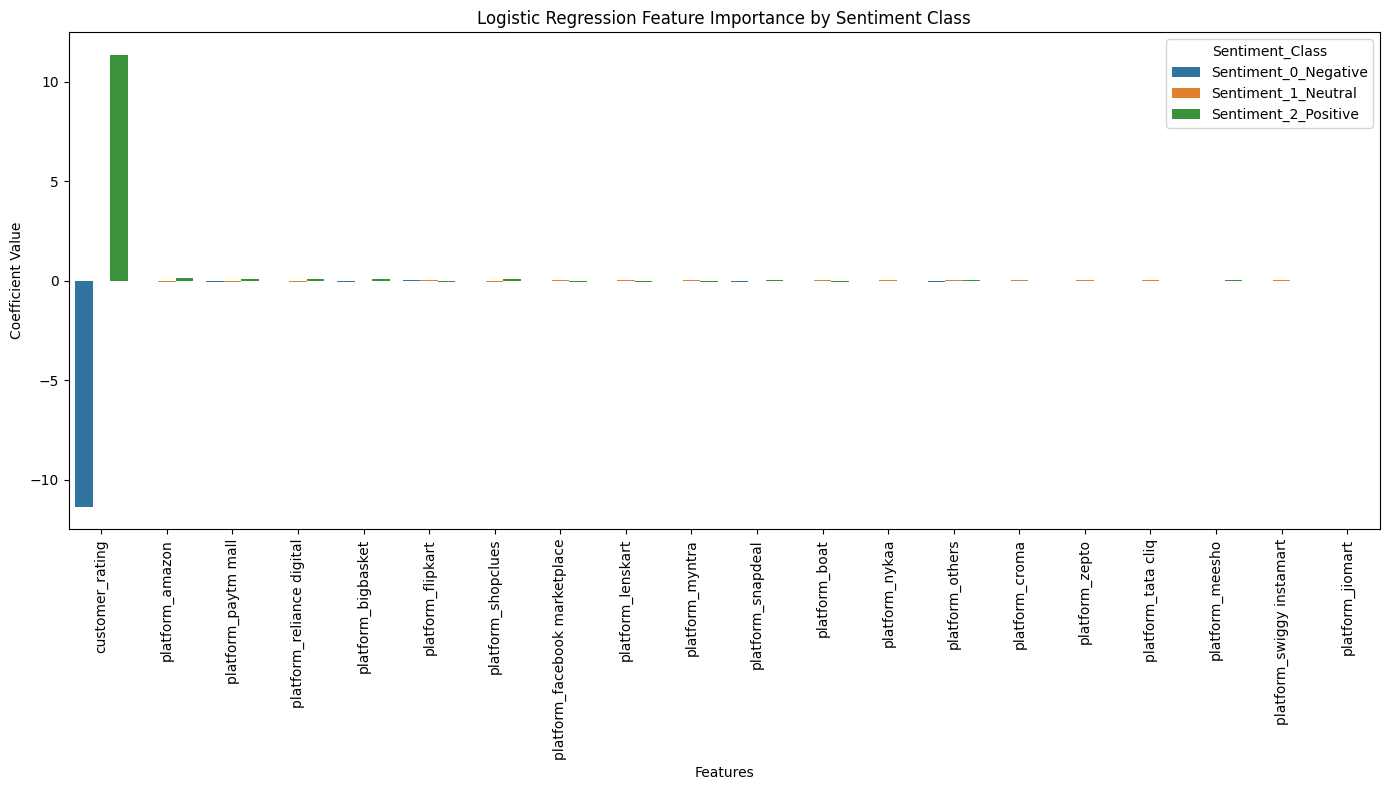

Logistic Regression feature importance visualized.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract coefficients from the Logistic Regression model
coefficients = log_reg_model.coef_

# Get feature names
feature_names = X.columns

# Create a DataFrame to associate coefficients with feature names and sentiment classes
coef_df = pd.DataFrame(
    coefficients.T,
    index=feature_names,
    columns=['Sentiment_0_Negative', 'Sentiment_1_Neutral', 'Sentiment_2_Positive']
)

# Calculate overall absolute importance for sorting (e.g., sum of absolute coefficients across all classes)
coef_df['Overall_Absolute_Importance'] = coef_df.abs().sum(axis=1)

# Sort features by overall absolute importance in descending order
coef_df_sorted = coef_df.sort_values(by='Overall_Absolute_Importance', ascending=False).drop(columns='Overall_Absolute_Importance')

# Melt the DataFrame for plotting (long format)
coef_melted = coef_df_sorted.reset_index().melt(
    id_vars='index',
    var_name='Sentiment_Class',
    value_name='Coefficient_Value'
)
coef_melted.rename(columns={'index': 'Feature'}, inplace=True)

# Plot the coefficients
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Coefficient_Value', hue='Sentiment_Class', data=coef_melted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance by Sentiment Class')
plt.tight_layout()
plt.show()

print("Logistic Regression feature importance visualized.")

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('O') to dtype('float64') with casting rule 'same_kind'

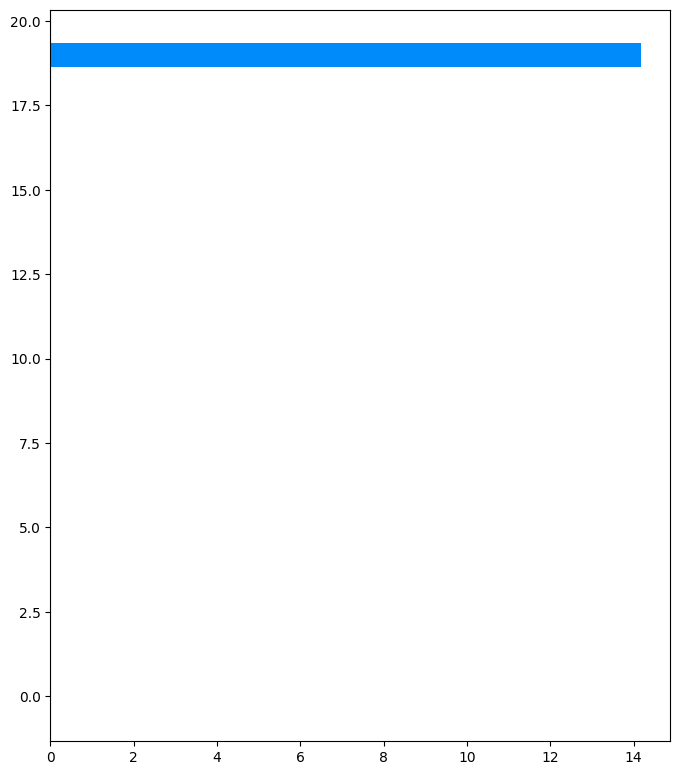

In [19]:
import shap
import matplotlib.pyplot as plt

# 1. Initialize a SHAP explainer for the Logistic Regression model
# Since it's a linear model, shap.LinearExplainer is appropriate.
explainer = shap.LinearExplainer(log_reg_model, X_train)

# 2. Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# 3. Generate a SHAP summary plot (bar plot) to show global feature importance
# The classes are 0: Negative, 1: Neutral, 2: Positive
# We will label them accordingly for the plot.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=['Negative', 'Neutral', 'Positive'], show=False)
plt.title('SHAP Global Feature Importance for Logistic Regression (Bar Plot)')
plt.tight_layout()
plt.show()

# 4. Create a SHAP dependence plot for 'customer_rating' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
shap.dependence_plot("customer_rating", shap_values[2], X_test, title='SHAP Dependence Plot for Customer Rating on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

# 5. Create a SHAP dependence plot for 'platform_amazon' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
shap.dependence_plot("platform_amazon", shap_values[2], X_test, title='SHAP Dependence Plot for Platform_Amazon on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

print("SHAP explanations generated and visualized for Logistic Regression model.")

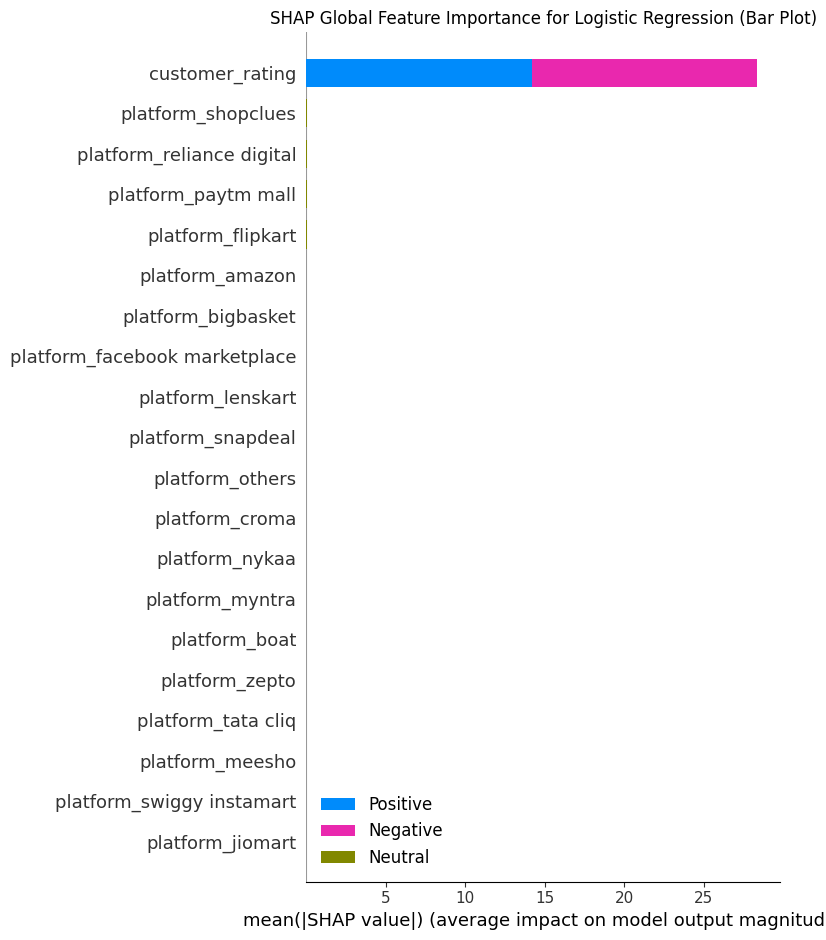

IndexError: index 19 is out of bounds for axis 1 with size 3

<Figure size 1000x600 with 0 Axes>

In [20]:
import shap
import matplotlib.pyplot as plt

# Convert boolean columns in X_train and X_test to integers (0 or 1)
X_train_numeric = X_train.astype(int)
X_test_numeric = X_test.astype(int)

# 1. Initialize a SHAP explainer for the Logistic Regression model
# Since it's a linear model, shap.LinearExplainer is appropriate.
explainer = shap.LinearExplainer(log_reg_model, X_train_numeric)

# 2. Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_numeric)

# 3. Generate a SHAP summary plot (bar plot) to show global feature importance
# The classes are 0: Negative, 1: Neutral, 2: Positive
# We will label them accordingly for the plot.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", class_names=['Negative', 'Neutral', 'Positive'], show=False)
plt.title('SHAP Global Feature Importance for Logistic Regression (Bar Plot)')
plt.tight_layout()
plt.show()

# 4. Create a SHAP dependence plot for 'customer_rating' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
shap.dependence_plot("customer_rating", shap_values[2], X_test_numeric, title='SHAP Dependence Plot for Customer Rating on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

# 5. Create a SHAP dependence plot for 'platform_amazon' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
shap.dependence_plot("platform_amazon", shap_values[2], X_test_numeric, title='SHAP Dependence Plot for Platform_Amazon on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

print("SHAP explanations generated and visualized for Logistic Regression model.")

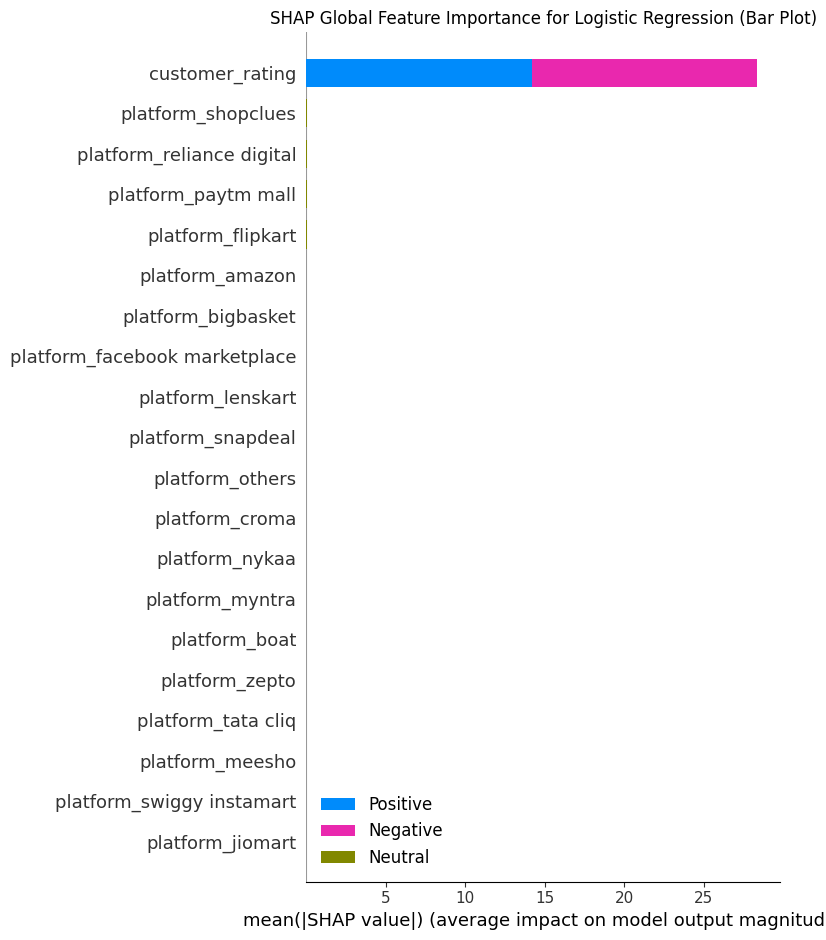

TypeError: dependence_legacy() got an unexpected keyword argument 'class_id'

<Figure size 1000x600 with 0 Axes>

In [21]:
import shap
import matplotlib.pyplot as plt

# Convert boolean columns in X_train and X_test to integers (0 or 1)
X_train_numeric = X_train.astype(int)
X_test_numeric = X_test.astype(int)

# 1. Initialize a SHAP explainer for the Logistic Regression model
# Since it's a linear model, shap.LinearExplainer is appropriate.
explainer = shap.LinearExplainer(log_reg_model, X_train_numeric)

# 2. Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_numeric)

# 3. Generate a SHAP summary plot (bar plot) to show global feature importance
# The classes are 0: Negative, 1: Neutral, 2: Positive
# We will label them accordingly for the plot.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", class_names=['Negative', 'Neutral', 'Positive'], show=False)
plt.title('SHAP Global Feature Importance for Logistic Regression (Bar Plot)')
plt.tight_layout()
plt.show()

# 4. Create a SHAP dependence plot for 'customer_rating' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
# Pass the full shap_values and specify class_id=2
shap.dependence_plot("customer_rating", shap_values, X_test_numeric, class_id=2, title='SHAP Dependence Plot for Customer Rating on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

# 5. Create a SHAP dependence plot for 'platform_amazon' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
# Pass the full shap_values and specify class_id=2
shap.dependence_plot("platform_amazon", shap_values, X_test_numeric, class_id=2, title='SHAP Dependence Plot for Platform_Amazon on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

print("SHAP explanations generated and visualized for Logistic Regression model.")

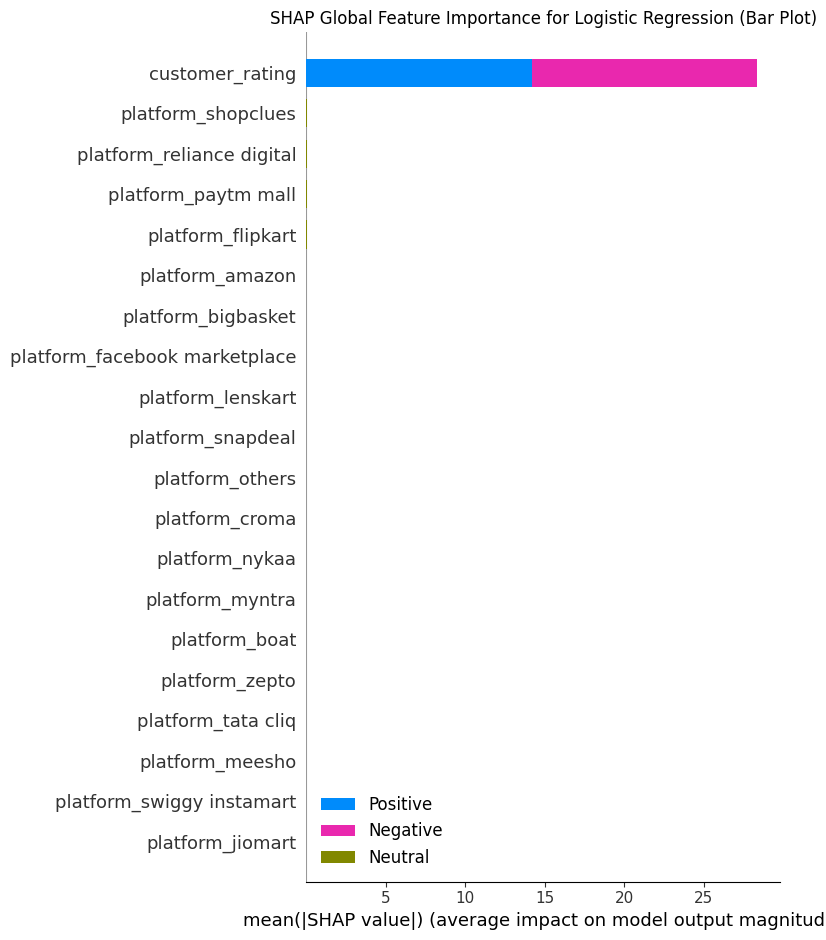

IndexError: index 19 is out of bounds for axis 1 with size 3

<Figure size 1000x600 with 0 Axes>

In [22]:
import shap
import matplotlib.pyplot as plt

# Convert boolean columns in X_train and X_test to integers (0 or 1)
X_train_numeric = X_train.astype(int)
X_test_numeric = X_test.astype(int)

# 1. Initialize a SHAP explainer for the Logistic Regression model
# Since it's a linear model, shap.LinearExplainer is appropriate.
explainer = shap.LinearExplainer(log_reg_model, X_train_numeric)

# 2. Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_numeric)

# 3. Generate a SHAP summary plot (bar plot) to show global feature importance
# The classes are 0: Negative, 1: Neutral, 2: Positive
# We will label them accordingly for the plot.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", class_names=['Negative', 'Neutral', 'Positive'], show=False)
plt.title('SHAP Global Feature Importance for Logistic Regression (Bar Plot)')
plt.tight_layout()
plt.show()

# Get the integer index for 'customer_rating' and 'platform_amazon'
customer_rating_idx = X_test_numeric.columns.get_loc('customer_rating')
platform_amazon_idx = X_test_numeric.columns.get_loc('platform_amazon')

# 4. Create a SHAP dependence plot for 'customer_rating' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
# Pass the SHAP values for the positive class (shap_values[2]) and the integer index
shap.dependence_plot(customer_rating_idx, shap_values[2], X_test_numeric, title='SHAP Dependence Plot for Customer Rating on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

# 5. Create a SHAP dependence plot for 'platform_amazon' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
# Pass the SHAP values for the positive class (shap_values[2]) and the integer index
shap.dependence_plot(platform_amazon_idx, shap_values[2], X_test_numeric, title='SHAP Dependence Plot for Platform_Amazon on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

print("SHAP explanations generated and visualized for Logistic Regression model.")

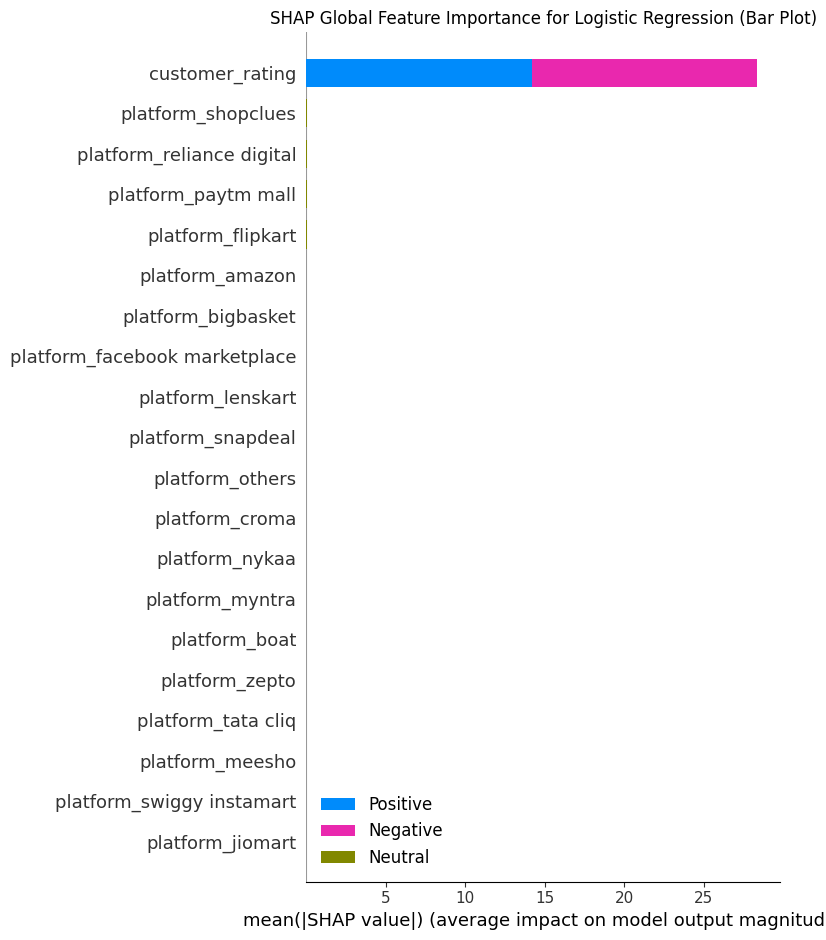

<Figure size 1000x600 with 0 Axes>

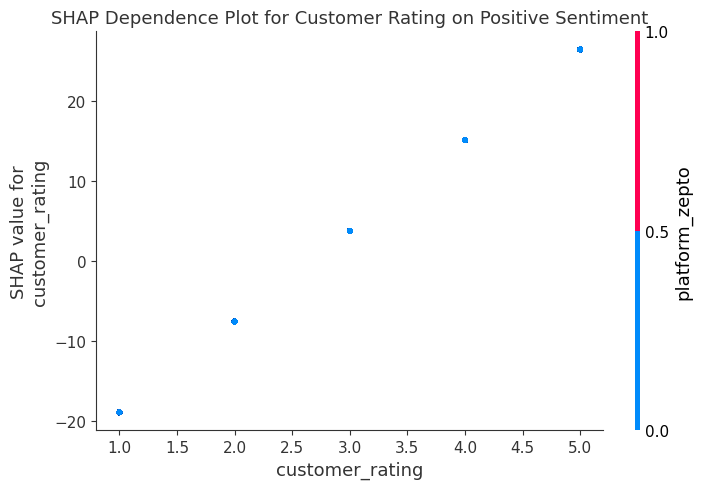

<Figure size 1000x600 with 0 Axes>

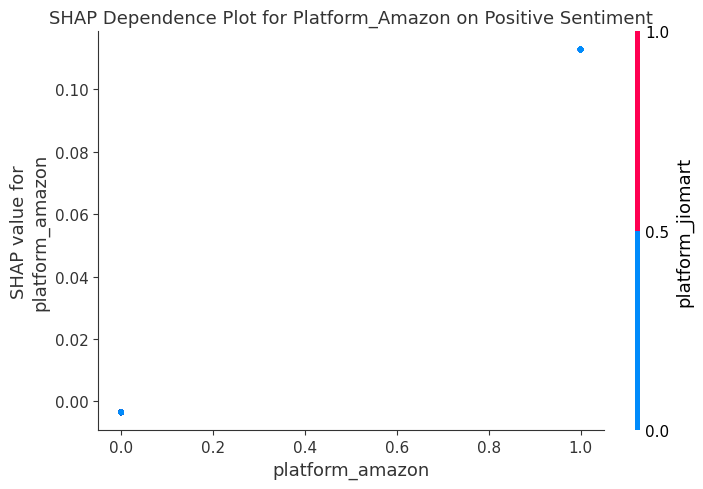

SHAP explanations generated and visualized for Logistic Regression model.


In [23]:
import shap
import matplotlib.pyplot as plt

# Convert boolean columns in X_train and X_test to integers (0 or 1)
X_train_numeric = X_train.astype(int)
X_test_numeric = X_test.astype(int)

# 1. Initialize a SHAP explainer for the Logistic Regression model
# Since it's a linear model, shap.LinearExplainer is appropriate.
explainer = shap.LinearExplainer(log_reg_model, X_train_numeric)

# 2. Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_numeric)

# 3. Generate a SHAP summary plot (bar plot) to show global feature importance
# The classes are 0: Negative, 1: Neutral, 2: Positive
# We will label them accordingly for the plot.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", class_names=['Negative', 'Neutral', 'Positive'], show=False)
plt.title('SHAP Global Feature Importance for Logistic Regression (Bar Plot)')
plt.tight_layout()
plt.show()

# Get the integer index for 'customer_rating' and 'platform_amazon'
customer_rating_idx = X_test_numeric.columns.get_loc('customer_rating')
platform_amazon_idx = X_test_numeric.columns.get_loc('platform_amazon')

# 4. Create a SHAP dependence plot for 'customer_rating' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
# Pass the SHAP values for the positive class (shap_values[:, :, 2]) and the integer index
shap.dependence_plot(customer_rating_idx, shap_values[:, :, 2], X_test_numeric, title='SHAP Dependence Plot for Customer Rating on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

# 5. Create a SHAP dependence plot for 'platform_amazon' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
# Pass the SHAP values for the positive class (shap_values[:, :, 2]) and the integer index
shap.dependence_plot(platform_amazon_idx, shap_values[:, :, 2], X_test_numeric, title='SHAP Dependence Plot for Platform_Amazon on Positive Sentiment', show=False)
plt.tight_layout()
plt.show()

print("SHAP explanations generated and visualized for Logistic Regression model.")

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. Initialize a SHAP KernelExplainer for the SVM model
# Using a sample of X_train_numeric for the background dataset to speed up computation.
# KernelExplainer's performance significantly depends on the size of the background data.
background_data = X_train_numeric.sample(n=100, random_state=42)
explainer = shap.KernelExplainer(svm_model.decision_function, background_data)

# 2. Calculate SHAP values for the test dataset
# Note: KernelExplainer can be computationally intensive for large datasets.
shap_values = explainer.shap_values(X_test_numeric)

# 3. Generate a SHAP summary plot (bar plot) to show global feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", class_names=['Negative', 'Neutral', 'Positive'], show=False)
plt.title('SHAP Global Feature Importance for SVM (Bar Plot)')
plt.tight_layout()
plt.show()

# Get the integer index for 'customer_rating' and 'platform_amazon'
customer_rating_idx = X_test_numeric.columns.get_loc('customer_rating')
platform_amazon_idx = X_test_numeric.columns.get_loc('platform_amazon')

# 4. Create a SHAP dependence plot for 'customer_rating' for the 'Positive' sentiment class (class_id=2)
# For KernelExplainer with multi-output models, shap_values is typically a list of arrays,
# where each array corresponds to a class and has shape (n_samples, n_features).
plt.figure(figsize=(10, 6))
shap.dependence_plot(customer_rating_idx, shap_values[2], X_test_numeric, title='SHAP Dependence Plot for Customer Rating on Positive Sentiment (SVM)', show=False)
plt.tight_layout()
plt.show()

# 5. Create a SHAP dependence plot for 'platform_amazon' for the 'Positive' sentiment class (class_id=2)
plt.figure(figsize=(10, 6))
shap.dependence_plot(platform_amazon_idx, shap_values[2], X_test_numeric, title='SHAP Dependence Plot for Platform_Amazon on Positive Sentiment (SVM)', show=False)
plt.tight_layout()
plt.show()

print("SHAP explanations generated and visualized for SVM model.")

  0%|          | 0/4083 [00:00<?, ?it/s]